In [6]:
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline

from keras.layers import Dense, InputLayer
from keras.models import Sequential

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import PIL
from PIL import Image

import os

In [2]:
'''
On Colab
from google.colab import drive
drive.mount('/content/drive')
'''

Mounted at /content/drive


In [3]:
# I unzipped the folders manually

In [4]:
'''
On Colab
training_df = pd.read_csv("drive/MyDrive/train_hackathon/train.csv")
test_df= pd.read_csv("drive/MyDrive/test_hackathon/test.csv")
'''

In [7]:
training_df = pd.read_csv("./train_hackathon/train.csv")
test_df= pd.read_csv("./test_hackathon/test.csv")

In [9]:
training_df[training_df["filename"]=="9855.jpg"]

,image_id,filename,label


In [3]:
training_df.head()

,image_id,filename,label
0,1,1.jpg,0
1,2,2.jpg,0
2,3,3.jpg,0
3,4,4.jpg,0
4,5,5.jpg,0


In [5]:
training_df[training_df["label"]==1]["filename"].values

array(['18.jpg', '63.jpg', '101.jpg', '118.jpg', '140.jpg', '142.jpg',
       '159.jpg', '183.jpg', '216.jpg', '248.jpg', '334.jpg', '354.jpg',
       '367.jpg', '385.jpg', '420.jpg', '427.jpg', '434.jpg', '439.jpg',
       '453.jpg', '475.jpg', '493.jpg', '500.jpg', '513.jpg', '520.jpg',
       '523.jpg', '547.jpg', '558.jpg', '559.jpg', '621.jpg', '623.jpg',
       '659.jpg', '688.jpg', '695.jpg', '702.jpg', '725.jpg', '726.jpg',
       '729.jpg', '739.jpg', '768.jpg', '786.jpg', '787.jpg', '794.jpg',
       '845.jpg', '867.jpg', '873.jpg', '879.jpg', '911.jpg', '970.jpg',
       '973.jpg', '1028.jpg', '1036.jpg', '1049.jpg', '1060.jpg',
       '1065.jpg', '1067.jpg', '1094.jpg', '1155.jpg', '1226.jpg',
       '1227.jpg', '1246.jpg', '1254.jpg', '1304.jpg', '1313.jpg',
       '1349.jpg', '1352.jpg', '1386.jpg', '1404.jpg', '1412.jpg',
       '1429.jpg', '1430.jpg', '1442.jpg', '1459.jpg', '1478.jpg',
       '1496.jpg', '1507.jpg', '1531.jpg', '1539.jpg', '1552.jpg',
       '1555.jpg'

In [19]:
img_name= "1.jpg"
#img = plt.imread('drive/MyDrive/train_hackathon/images/' + img_name)
img= plt.imread('./train_hackathon/images/' + img_name)

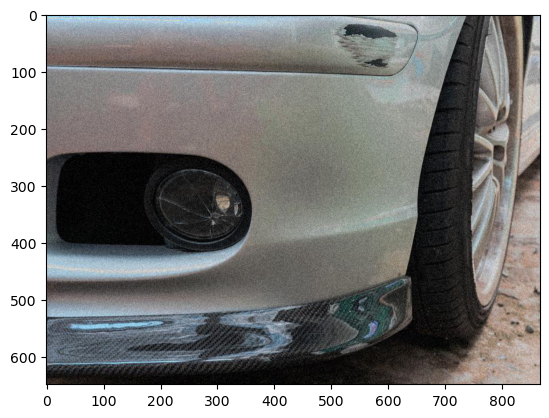

In [20]:
plt.imshow(img)

In [21]:
img.shape

(649, 866, 3)

In [22]:
training_df.shape

(8079, 3)

In [23]:
training_df["label"].value_counts()

label
0    7614
1     465
Name: count, dtype: int64

In [24]:
test_df.shape

(3462, 2)

In [25]:
test_df.head()

,image_id,filename
0,8080,8080.jpg
1,8081,8081.jpg
2,8082,8082.jpg
3,8083,8083.jpg
4,8084,8084.jpg


In [26]:
# plt.imread('drive/MyDrive/test_hackathon/images/' + "8080.jpg").shape
plt.imread('./test_hackathon/images/' + "8080.jpg").shape

(980, 1307, 3)

In [27]:
# plt.imread('drive/MyDrive/test_hackathon/images/' + "8080.jpg").size
plt.imread('./test_hackathon/images/' + "8080.jpg").size

3842580

In [28]:
# plt.imread('drive/MyDrive/test_hackathon/images/' + "8080.jpg").shape == (980, 1307, 3)
plt.imread('./test_hackathon/images/' + "8080.jpg").shape == (980, 1307, 3)

True

**Let us use the PIL.Image module**

In [34]:
with Image.open('drive/MyDrive/train_hackathon/images/' + '1.jpg') as img:
            print(img)
            print(img.size, img.mode, type(img.mode))
            # img.shape gives an attribute error

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=866x649 at 0x7E1B065E6EF0>
(866, 649) RGB <class 'str'>


In [10]:
with Image.open('./test_hackathon/images/8080.jpg') as img:
            print(img)
            print(img.size, img.mode, type(img.mode))

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1307x980 at 0x7F269AB03990>
(1307, 980) RGB <class 'str'>


**Let us check if all images are of the same size and if all images are RGB**

Let us check the training images first

The following function takes as arguments a path to a folder that contains images and a data frame with a column called filename that has the names of the image files in that folder. The goal is to check that all images are RGB in that folder

In [87]:
def non_RGB_images(images_folder, df):
    non_RGB_images=[]
    for img_name in df["filename"]:
        img_path = os.path.join(images_folder, img_name)
        with Image.open(img_path) as img:
            if img.mode != "RGB":
                non_RGB_images.append(img_name)
    return(non_RGB_images) 

In [88]:
train_image_folder= './train_hackathon/images/'
non_RGB_train_imgs = non_RGB_images(train_image_folder, training_df)
non_RGB_train_imgs

[]

The following function checks, in some image folder, how many images have a size different than some specific size

In [89]:
def different_size_images(images_folder, df, size_x, size_y):
    different_size_images= [] 
    for img_name in df["filename"]:
        img_path = os.path.join(images_folder, img_name)
        with Image.open(img_path) as img:
            if img.size != (size_x, size_y):
                different_size_images.append(img_name)
    return different_size_images            

In [66]:
# I chose to check the size (866,649) simply because it is the size of the first image in the folder.
train_image_folder = './train_hackathon/images/'
different_size_train_imgs = different_size_images( train_image_folder, training_df, 866, 649)
len(different_size_train_imgs)

8043

The image_size_df function creates a data frame of three columns. The first one has the image files' names in some folder, the second the size of the corresponding images, and the third the total number of pixels.

In [77]:
def calculate_number_of_pixels(image_size_tuple):
    return image_size_tuple[0] * image_size_tuple[1]

def image_size_df(images_folder, df):
    imgs_sizes=[]
    for img_name in df["filename"]:
        img_path = os.path.join(images_folder, img_name)
        with Image.open(img_path) as img:
            imgs_sizes.append(img.size)
    df_to_return = pd.DataFrame({"filename":df["filename"].values ,"image size":imgs_sizes})
    df_to_return['num of pixels'] = df_to_return['image size'].apply(calculate_number_of_pixels)
    return df_to_return

In [78]:
df_train_imgs_sizes = image_size_df(train_image_folder, training_df)
df_train_imgs_sizes.head()

,filename,image size,num of pixels
0,1.jpg,"(866, 649)",562034
1,2.jpg,"(1206, 904)",1090224
2,3.jpg,"(900, 675)",607500
3,4.jpg,"(1146, 859)",984414
4,5.jpg,"(1390, 1042)",1448380


In [79]:
type(df_train_imgs_sizes.iloc[0]["image size"])

tuple

In [80]:
max_train_img_num_pixels = df_train_imgs_sizes["num of pixels"].max()
df_train_imgs_sizes[df_train_imgs_sizes["num of pixels"]== max_train_img_num_pixels]

,filename,image size,num of pixels
258,259.jpg,"(1500, 1125)",1687500
600,601.jpg,"(1500, 1125)",1687500
855,856.jpg,"(1500, 1125)",1687500
1659,1660.jpg,"(1500, 1125)",1687500
3329,3330.jpg,"(1500, 1125)",1687500
3882,3883.jpg,"(1500, 1125)",1687500
4455,4456.jpg,"(1500, 1125)",1687500
4783,4784.jpg,"(1500, 1125)",1687500
4908,4909.jpg,"(1500, 1125)",1687500
6468,6469.jpg,"(1500, 1125)",1687500


In [81]:
df_train_imgs_sizes[(df_train_imgs_sizes['image size'].apply(lambda x: x[0] > 1500 or x[1] > 1125))]

,filename,image size,num of pixels


In [82]:
min_train_img_num_pixels = df_train_imgs_sizes["num of pixels"].min()
df_train_imgs_sizes[df_train_imgs_sizes["num of pixels"]== min_train_img_num_pixels]

,filename,image size,num of pixels
267,268.jpg,"(800, 600)",480000
380,381.jpg,"(800, 600)",480000
547,548.jpg,"(800, 600)",480000
719,720.jpg,"(800, 600)",480000
728,729.jpg,"(800, 600)",480000
796,797.jpg,"(800, 600)",480000
1027,1028.jpg,"(800, 600)",480000
1531,1532.jpg,"(800, 600)",480000
1703,1704.jpg,"(800, 600)",480000
1713,1714.jpg,"(800, 600)",480000


In [83]:
df_train_imgs_sizes[(df_train_imgs_sizes['image size'].apply(lambda x: x[0] < 800 or x[1] < 600))]

,filename,image size,num of pixels


**Conclusion: In the training set, the biggest image is of size 1500x1125 and the smallest image is of size 800x600**

Let us check the testing images

In [91]:
test_image_folder='./test_hackathon/images/'
non_RGB_test_images = non_RGB_images(test_image_folder, test_df)      
non_RGB_test_images

[]

In [92]:
test_image_folder='./test_hackathon/images/'
different_shapes_test_images = different_size_images(test_image_folder, test_df, 1307, 980)
len(different_shapes_test_images)               

3457

In [93]:
df_test_imgs_sizes = image_size_df(test_image_folder, test_df)
df_test_imgs_sizes.head()

,filename,image size,num of pixels
0,8080.jpg,"(1307, 980)",1280860
1,8081.jpg,"(881, 660)",581460
2,8082.jpg,"(853, 639)",545067
3,8083.jpg,"(1198, 898)",1075804
4,8084.jpg,"(859, 644)",553196


In [94]:
max_test_img_num_pixels = df_test_imgs_sizes["num of pixels"].max()
df_test_imgs_sizes[df_test_imgs_sizes["num of pixels"]== max_test_img_num_pixels]

,filename,image size,num of pixels
748,8828.jpg,"(1500, 1125)",1687500
795,8875.jpg,"(1500, 1125)",1687500
1640,9720.jpg,"(1500, 1125)",1687500
2130,10210.jpg,"(1500, 1125)",1687500


In [95]:
df_test_imgs_sizes[(df_test_imgs_sizes['image size'].apply(lambda x: x[0] > 1500 or x[1] > 1125))]

,filename,image size,num of pixels


In [96]:
min_test_img_num_pixels = df_train_imgs_sizes["num of pixels"].min()
df_test_imgs_sizes[df_test_imgs_sizes["num of pixels"]== min_test_img_num_pixels]

,filename,image size,num of pixels
83,8163.jpg,"(800, 600)",480000
108,8188.jpg,"(800, 600)",480000
221,8301.jpg,"(800, 600)",480000
832,8912.jpg,"(800, 600)",480000
836,8916.jpg,"(800, 600)",480000
978,9058.jpg,"(800, 600)",480000
1173,9253.jpg,"(800, 600)",480000
1735,9815.jpg,"(800, 600)",480000
1756,9836.jpg,"(800, 600)",480000
1787,9867.jpg,"(800, 600)",480000


In [97]:
df_test_imgs_sizes[(df_test_imgs_sizes['image size'].apply(lambda x: x[0] < 800 or x[1] < 600))]

,filename,image size,num of pixels
